### Laboratory work 5: Fuzzy Numbers
The task of the lab is to develop the fuzzy operations:
* Division in the method __truediv__
* Summation in the method __add__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [ ]:
public Domain(double min, double max, double precision=0.01)
        {
            Max = max;
            Min = min;
            Precision = precision;
            ArrayLength = (int)((Max - Min) / Precision) + 10;
        }

In [ ]:
def Domain(min_el, max_el, precision=0.1):
    Min_el = min_el
    Max_el = max_el
    Precision = precision
    

In [ ]:
values=[]

class FuzzyNumber:
    
    def __init__(self, domain_) -> None:
        self.__values = None;
        self.domain = None;
        self.domain = (domain_)
        self.__values = Utils.newArray(domain_.ArrayLength, 0)
        
        
    def get_indexer_item(self, x : float) -> float:
        if ((x < Domain.Min) or x > Domain.Max): 
            return 0
        return values[Domain.ToInt(x) # error ]

    def set_indexer_item(self, x : float, value : float) -> float:
        values[Domain.ToInt(x) # error ] = (value)
        return value



In [53]:
def mu_max(val,width,x):
    buff = ((x-val)/width)*((x-val)/width)
    #print(max(0,1-buff))
    return max(0,1-buff)  


class FuzzyValue():
    
    def __init__(self,val,width,mu = None):
        self.val = float(val)
        self.width = float(width)
        self.precision=0.2
        self.max_el = self.val+self.width
        self.min_el = self.val-self.width
        self.values=[]
        self.fuzzyNumbers = self.max_el-self.min_el
        self.loop = round(self.fuzzyNumbers/self.precision)
        a = self.min_el
        for i in range(0,self.loop+1):
            self.values.append(a)
            a = a + self.precision
        
        
        if mu is not None:
            self.mu = partial(mu,self.val,self.width)
            #print(self.mu)
        self.op = None
    

    def __call__(self,x):
        if self.mu is not None:
            return float(self.mu(x))


    def __truediv__(self, o):
        # Put your code here
        maximum_global=10
        minimum_global=-10

        
        if self.max_el>o.max_el:
            maximum = o.max_el
        else:
             maximum = self.max_el
        if self.min_el<o.min_el:
            minimum = o.min_el
        else:
            minimum = self.min_el
        
        conv1 = [i for i in self.values if i>=minimum and i<=maximum+0.2]
        conv2 = [i for i in o.values if i>=minimum and i<=maximum+0.2]
        
        prec1 = []
        precision1=1.0
        for i in range(len(conv1)):
            prec1.append(precision1)
            precision1-=self.precision
        prec1[-1] = float(round(prec1[-1]))
        
        prec2=[]
        precision2=0.0
        for i in range(len(conv2)):
            prec2.append(precision2)
            precision2+=self.precision
            
        result=conv1
        value3=[]
        prec3=[]
        for ind, a in enumerate(conv1):
            for ind1,b in enumerate(conv1):
                value=a/b
                prec3.append(min(prec1[ind], prec2[ind1]))
                #print(value)
                if value<minimum_global or value>maximum_global:
                    continue
                else:
                    value3.append(value)
                    result[ind] = max(value, (a*b))
        
        index_max = prec3.index(max(prec3))
        index_min = prec3.index(min(prec3))
        #print(value3[index_max], value3[index_min])
        return value3[index_max], value3[index_min]
       
        #return max(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width), min(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width)
        #return FuzzyValue(self.val/o.val,self.width+o.width)

    def __add__(self, o): 
        # Put your code here
        self.op = o
        maximum_global=10
        minimum_global=-10
        
    
        if self.max_el>o.max_el:
            maximum = o.max_el
        else:
             maximum = self.max_el
        if self.min_el<o.min_el:
            minimum = o.min_el
        else:
            minimum = self.min_el
        
        conv1 = [i for i in self.values if i>=minimum and i<=maximum+0.2]
        conv2 = [i for i in o.values if i>=minimum and i<=maximum+0.2]
        
        prec1 = []
        precision1=1.0
        for i in range(len(conv1)):
            prec1.append(precision1)
            precision1-=self.precision
        prec1[-1] = float(round(prec1[-1]))
        
        prec2=[]
        precision2=0.0
        for i in range(len(conv2)):
            prec2.append(precision2)
            precision2+=self.precision
            
        result=conv1
        value3=[]
        prec3 = []
        for ind, a in enumerate(conv1):
            for ind1,b in enumerate(conv1):
                value=a+b
                #print(value)
                prec3.append(min(prec1[ind], prec2[ind1]))
                if value<minimum_global or value>maximum_global:
                    continue
                else:
                    value3.append(value)
                    result[ind] = max(value, (a*b))
        
        index_max = prec3.index(max(prec3))
        index_min = prec3.index(min(prec3))
        #print(value3[index_max], value3[index_min])
        return value3[index_max], value3[index_min]
        
    
    
    def draw(self):
        xs = np.linspace(-7,14,num=1000)
        y = [self(x) for x in xs]
        plt.figure()
        plt.plot(xs,y)        

a = FuzzyValue(3,1,mu_max)
b = FuzzyValue(4,1,mu_max)
# (a+b).draw()
#print(b(3))
#c=a+b
#d=



In [49]:
print(a+b)
#print(a/b)

7.000000000000003 6.000000000000002
(7.000000000000003, 6.000000000000002)


In [8]:
a

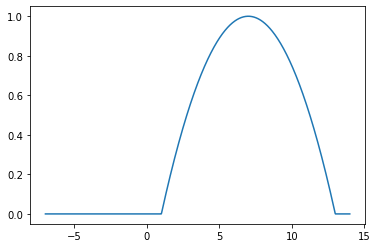

In [54]:
res_add = a+b
add_val = FuzzyValue(res_add[0],res_add[1],mu_max)
add_val.draw()

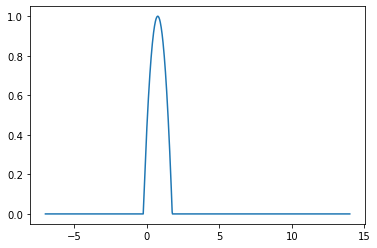

In [55]:
res_div = a/b
div_val = FuzzyValue(res_div[0],res_div[1],mu_max)
div_val.draw()

In [ ]:
def mu_max(val,width,x):
    buff = ((x-val)/width)*((x-val)/width)
    print(max(0,1-buff))
    return max(0,1-buff)  


class FuzzyValue():
    
    def __init__(self,val,width,mu = None):
        self.val = float(val)
        self.width = float(width)
        self.precision=0.2
        self.max_el = self.val+self.width
        self.min_el = self.val-self.width
        self.values=[]
        self.fuzzyNumbers = self.max_el-self.min_el
        self.loop = round(self.fuzzyNumbers/self.precision)
        a = self.min_el
        for i in range(0,self.loop+1):
            self.values.append(a)
            a = a + self.precision
        
        
        if mu is not None:
            self.mu = partial(mu,self.val,self.width)
            print(self.mu)
        self.op = None
    

    def __call__(self,x):
        if self.mu is not None:
            return float(self.mu(x))


    def __truediv__(self, o):
        # Put your code here
        maximum_global=10
        minimum_global=-10
        
        
        
        
        if self.max_el>o.max_el:
            maximum = o.max_el
        else:
             maximum = self.max_el
        if self.min_el<o.min_el:
            minimum = o.min_el
        else:
            minimum = self.min_el
        
        conv1 = [i for i in self.values if i>=minimum and i<=maximum+0.2]
        conv2 = [i for i in o.values if i>=minimum and i<=maximum+0.2]
        
        prec1 = []
        precision1=1.0
        for i in range(len(conv1)):
            prec1.append(precision1)
            precision1-=self.precision
        prec1[-1] = float(round(prec1[-1]))
        
        prec2=[]
        precision2=0.0
        for i in range(len(conv2)):
            prec2.append(precision2)
            precision2+=self.precision
            
        result=conv1
        value1=[]
        #result=[]
        for ind, a in enumerate(conv1):
            for ind,b in enumerate(conv1):
                value=a/b
                #print(value)
                if value<minimum_global or value>maximum_global:
                    continue
                else:
                    value1.append(value)
                    result[ind] = max(value, (a*b))
        
        
        #print(value1)
        print(max(result))
        #print(conv1)
        #print(prec1)
        #print(conv2)
        #print(prec2)
        '''for i in self.values:
            for j in o.values:'''
                
        
        
        
        
        #return max(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width), min(self.val/o.val, self.val/o.width, self.width/o.val, self.width/o.width)
        #return FuzzyValue(self.val/o.val,self.width+o.width)

    def __add__(self, o): 
        # Put your code here
        self.op = o
        maximum_global=10
        minimum_global=-10
        '''print(self.val, o.val)
        print(self.width, o.width)
        return self.val+o.val, self.width+o.width'''
    
        if self.max_el>o.max_el:
            maximum = o.max_el
        else:
             maximum = self.max_el
        if self.min_el<o.min_el:
            minimum = o.min_el
        else:
            minimum = self.min_el
        
        conv1 = [i for i in self.values if i>=minimum and i<=maximum+0.2]
        conv2 = [i for i in o.values if i>=minimum and i<=maximum+0.2]
        
        prec1 = []
        precision1=1.0
        for i in range(len(conv1)):
            prec1.append(precision1)
            precision1-=self.precision
        prec1[-1] = float(round(prec1[-1]))
        
        prec2=[]
        precision2=0.0
        for i in range(len(conv2)):
            prec2.append(precision2)
            precision2+=self.precision
            
        result=conv1
        value1=[]
        #result=[]
        for ind, a in enumerate(conv1):
            for ind,b in enumerate(conv1):
                value=a+b
                #print(value)
                if value<minimum_global or value>maximum_global:
                    continue
                else:
                    value1.append(value)
                    result[ind] = max(value, (a*b))
        
        
        print(result)
        print(max(result))
    
    
    def draw(self):
        xs = np.linspace(-7,14,num=1000)
        y = [self(x) for x in xs]
        plt.figure()
        plt.plot(xs,y)        

a = FuzzyValue(3,1,mu_max)
b = FuzzyValue(4,1,mu_max)
# (a+b).draw()
#print(b(3))
#c=a+b
#d=

